Final Assignment: Part 1 - Create Visualizations using Matplotlib, Seaborn & Folium

In [4]:
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
%pip install folium
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium


Usage:   
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: -y
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch data
response = requests.get(URL)
response.raise_for_status()  # Will raise an error if the request fails

# Read CSV from the response content
data = StringIO(response.text)
df = pd.read_csv(data)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

TASK 1.1

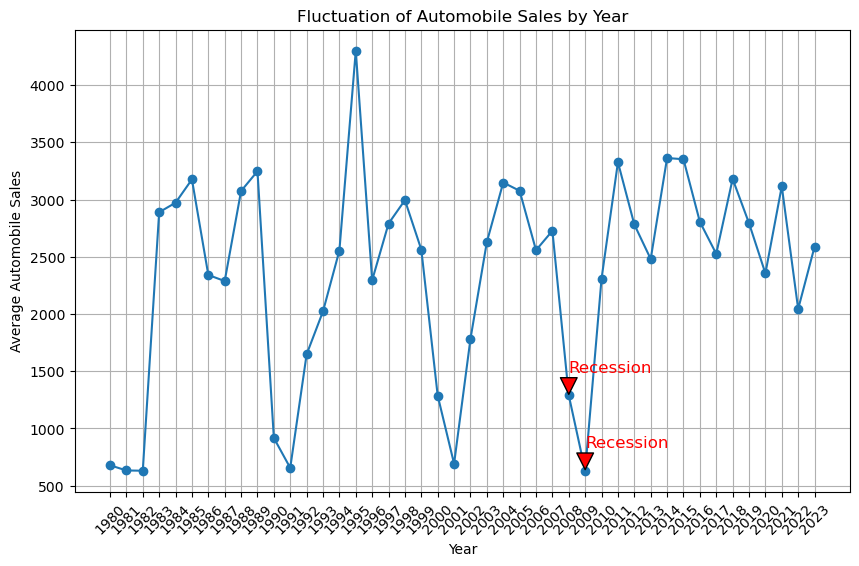

In [13]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

#Get yearly sales first
yearly_sales = df.groupby(df['Year'].dt.year)['Automobile_Sales'].mean()

#Create plot
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.xticks(yearly_sales.index, rotation=45)
plt.annotate('Recession', xy=(2008, yearly_sales[2008]), xytext=(2008, yearly_sales[2008] + 200),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.annotate('Recession', xy=(2009, yearly_sales[2009]), xytext=(2009, yearly_sales[2009] + 200),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')
plt.title('Fluctuation of Automobile Sales by Year')
plt.grid(True)
plt.show()

TASK 1.2

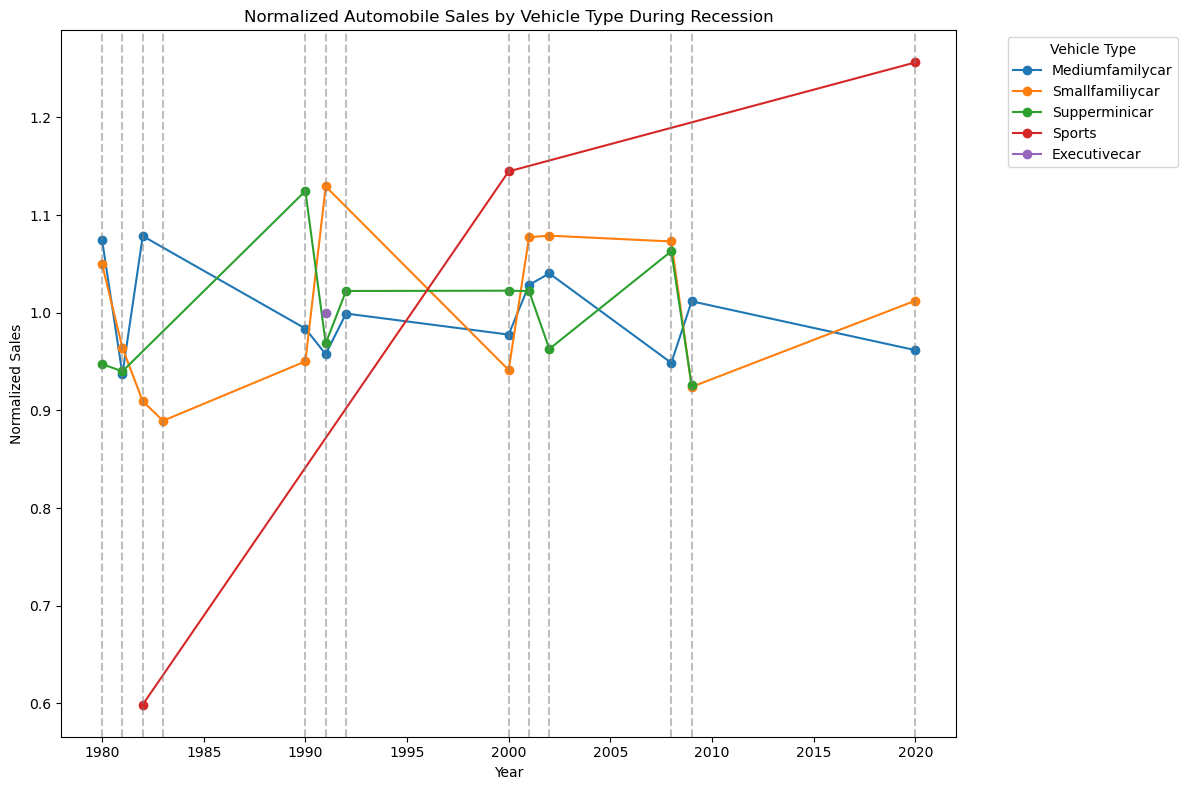

In [15]:
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())
df_Mline.set_index('Year', inplace=True)
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.tight_layout()
plt.show()

Based on the graph above, I can see that the demand for sports cars has continued upward, even through a recession, indicating that even in tough times, the luxury goods market is relatively stable. I also notice that small family cars went down but then steadily grew back up after the recession years whereas medium family cars have kept decreasing over time since the recession years.

TASK 1.3

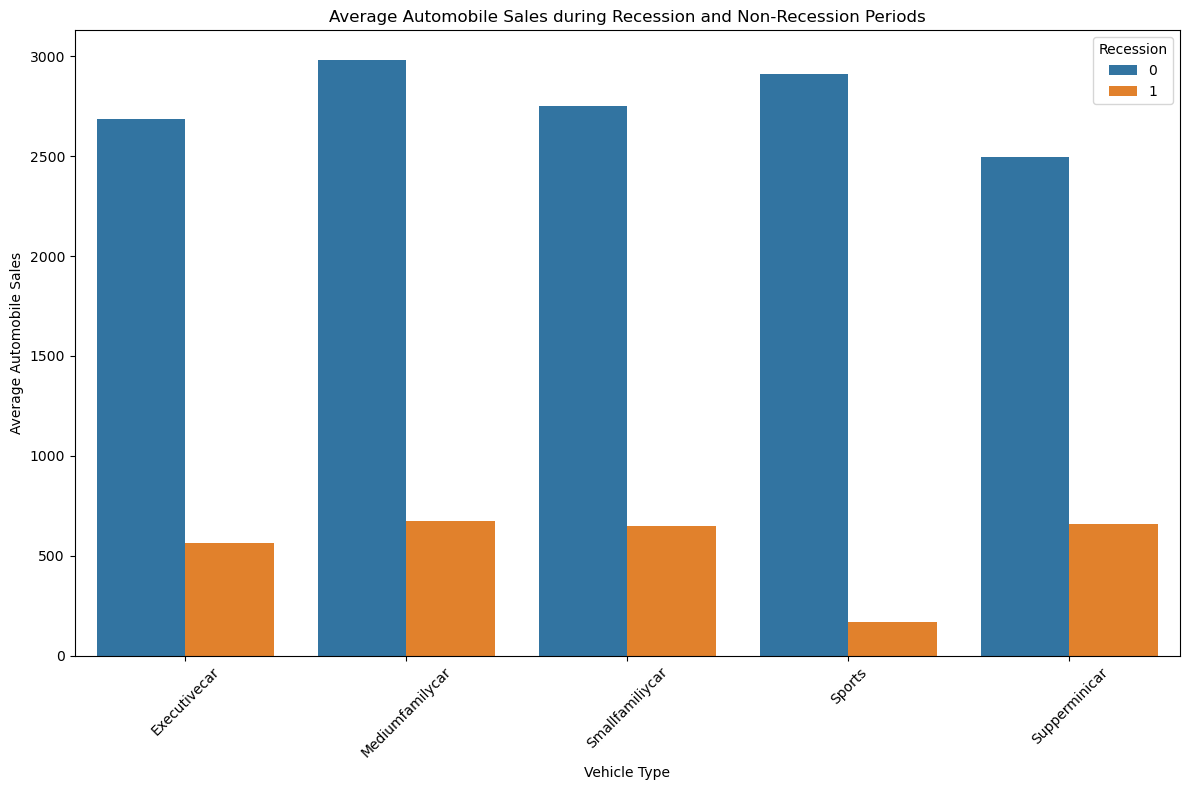

In [17]:
# Group the data by 'Recession' and 'Vehicle_Type' and calculate the average 'Automobile Sales'
df_grouped = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Create a barplot comparing sales during recession and non-recession periods
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=df_grouped)

# Add labels and title
plt.xlabel("Vehicle Type")
plt.ylabel("Average Automobile Sales")
plt.title("Average Automobile Sales during Recession and Non-Recession Periods")
plt.legend(title='Recession', loc='upper right')

# Show the plot
plt.xticks(rotation=45)  # Rotate the vehicle types for better readability
plt.tight_layout()
plt.show()

Understandably, there's a huge drop in sales during the recession and in other years. However, i did notice that sportscars and executive cars took the biggest hit, relative to their sales in non recession years. 

TASK 1.4

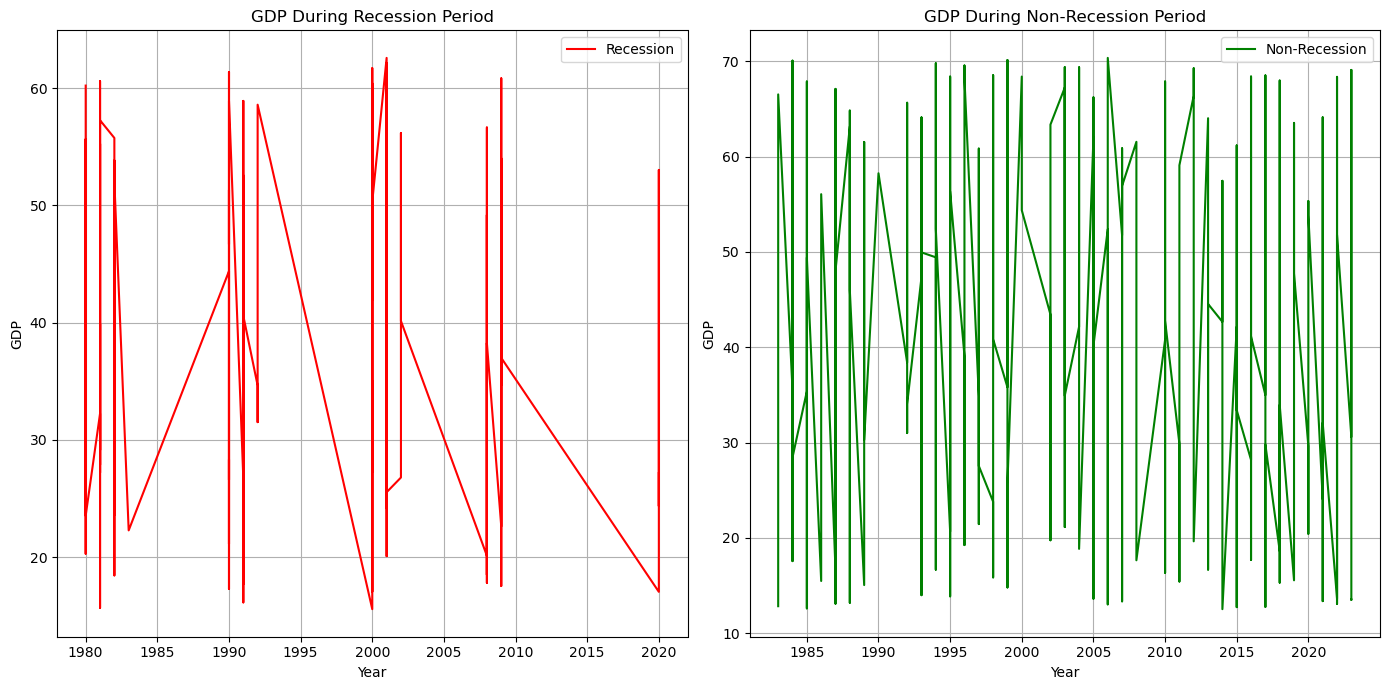

In [18]:
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]
fig = plt.figure(figsize=(14, 7))
#Recession Period
ax1 = fig.add_subplot(1, 2, 1)  #1 row, 2 columns, subplot 1
ax1.plot(df_recession['Year'], df_recession['GDP'], label="Recession", color='red')
ax1.set_title('GDP During Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.grid(True)
ax1.legend()
#Non-Recession Period
ax2 = fig.add_subplot(1, 2, 2)  #1 row, 2 columns, subplot 2
ax2.plot(df_non_recession['Year'], df_non_recession['GDP'], label="Non-Recession", color='green')
ax2.set_title('GDP During Non-Recession Period')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

Ah well, again, self explanatory. In the recession the GDP takes a big hit, there's no surprise that the automobile company also took a big hit. 

TASK 1.5

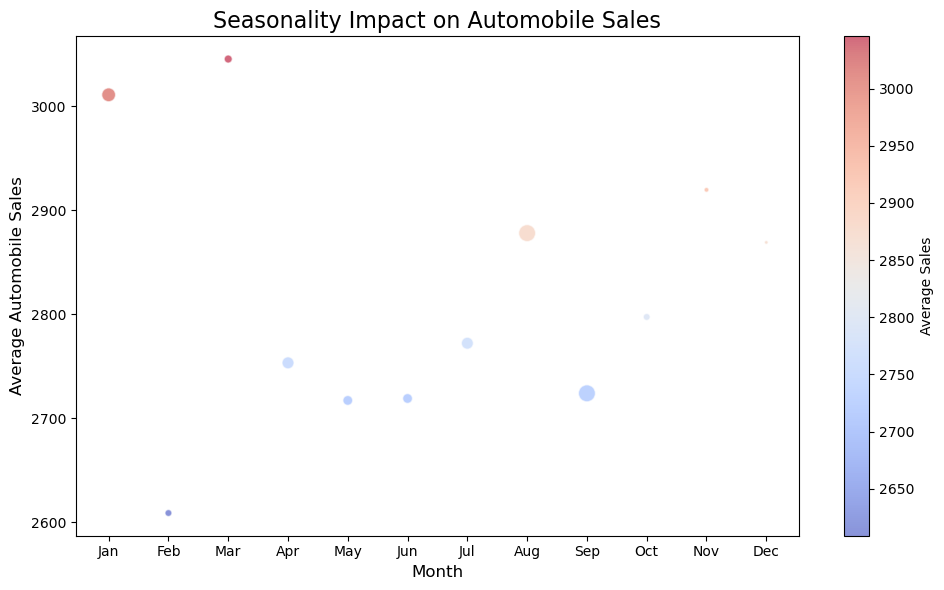

In [19]:
df_non_recession = df[df['Recession'] == 0]

#Group the data 
df_monthly_sales = df_non_recession.groupby('Month').agg(
    Average_Sales=('Automobile_Sales', 'mean'),
    Seasonality_Weight=('Seasonality_Weight', 'mean')
).reset_index()

#Create plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df_monthly_sales['Month'], 
    y=df_monthly_sales['Average_Sales'], 
    s=df_monthly_sales['Seasonality_Weight'] * 100,  
    c=df_monthly_sales['Average_Sales'],  
    cmap='coolwarm',  
    alpha=0.6,  
    edgecolors="w",  
)

plt.title('Seasonality Impact on Automobile Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.xticks(df_monthly_sales['Month'], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.colorbar(label='Average Sales') 
plt.tight_layout()
plt.show()

Well, there isn't too much from this. Perhaps, april saw some decrease in sales, while January, March and August sold the most. SO, not season dependent but generally speaking, first half of the year are when most  purchases are usually made.

TASK 1.6

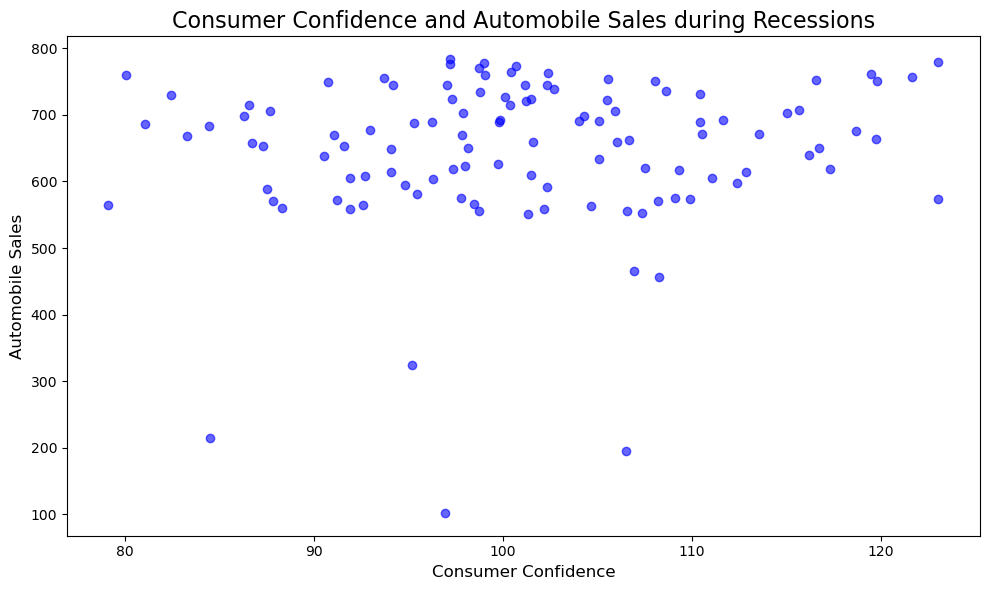

In [20]:
#Filter the data
df_recession = df[df['Recession'] == 1]
#Create the scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(df_recession['Consumer_Confidence'], df_recession['Automobile_Sales'], alpha=0.6, color='b')
plt.title('Consumer Confidence and Automobile Sales during Recessions', fontsize=16)
plt.xlabel('Consumer Confidence', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.tight_layout()
plt.show()

Consumer confidence more or less stayed the same with a few outliers hanging around at the bottom of the graph. Although, you do notice a very miniature dip at the start of the year and then a similar increase at the end of the year. 

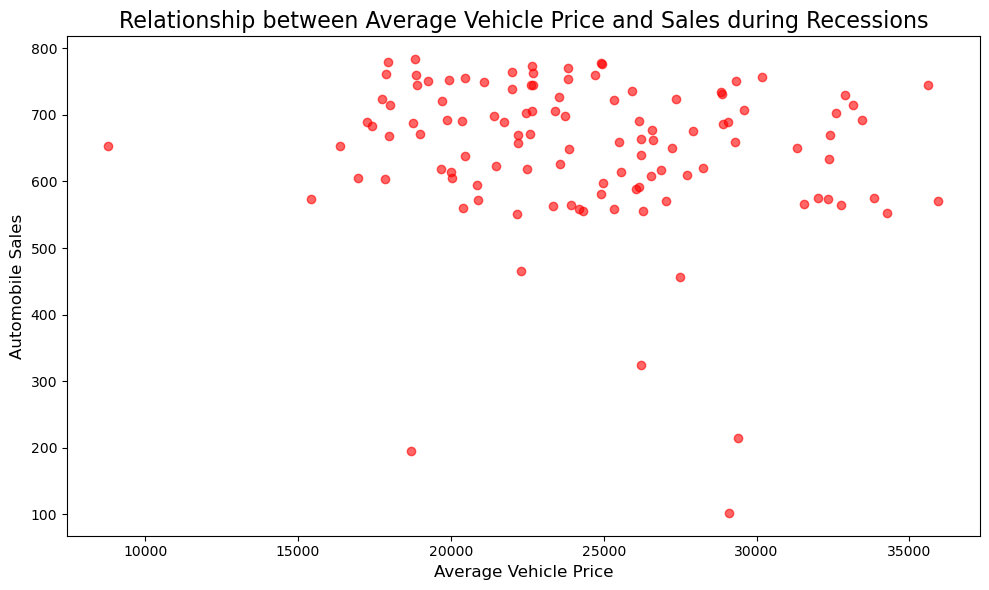

In [22]:
# Filter the data for recession years (Recession == 1)
df_recession = df[df['Recession'] == 1]

# Create the scatter plot for Average Vehicle Price vs Automobile Sales during recession
plt.figure(figsize=(10, 6))
plt.scatter(df_recession['Price'], df_recession['Automobile_Sales'], alpha=0.6, color='r')

# Add title and labels
plt.title('Relationship between Average Vehicle Price and Sales during Recessions', fontsize=16)
plt.xlabel('Average Vehicle Price', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Again, not much of a relation going on. You'd be drawing at strings to form a story out of both graphs in this sub task. 

TASK 1.7

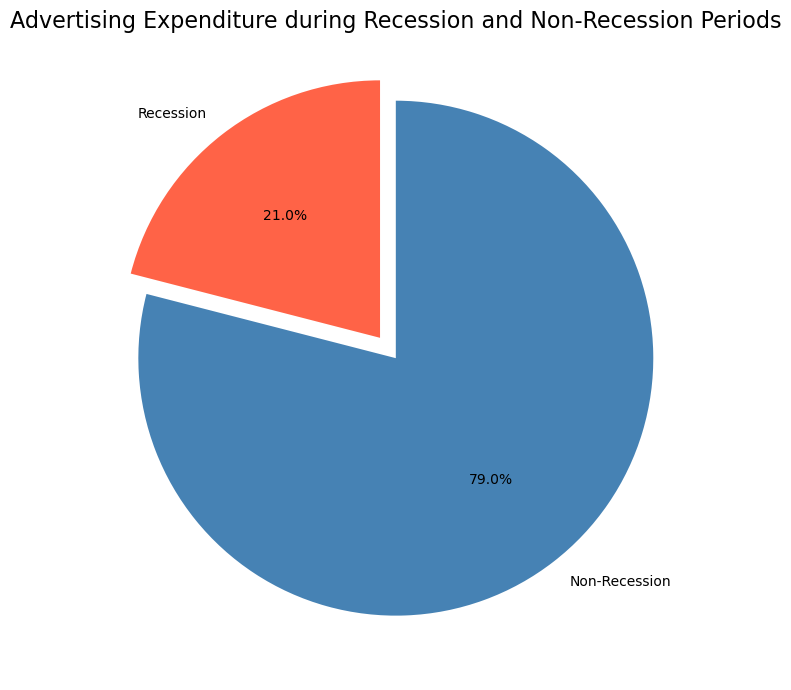

In [23]:
#DataFrames for Recession and Non-Recession periods
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

#Calculate the total advertising expenditure 
ad_expenditure_recession = df_recession['Advertising_Expenditure'].sum()
ad_expenditure_non_recession = df_non_recession['Advertising_Expenditure'].sum()

values = [ad_expenditure_recession, ad_expenditure_non_recession]
labels = ['Recession', 'Non-Recession']
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#4682B4'], explode=(0.1, 0))
plt.title('Advertising Expenditure during Recession and Non-Recession Periods', fontsize=16)
plt.tight_layout()
plt.show()

The company spent significantly more on advertising during non recession years. Understandably so. During the recession, it spent much less. 

TASK 1.8

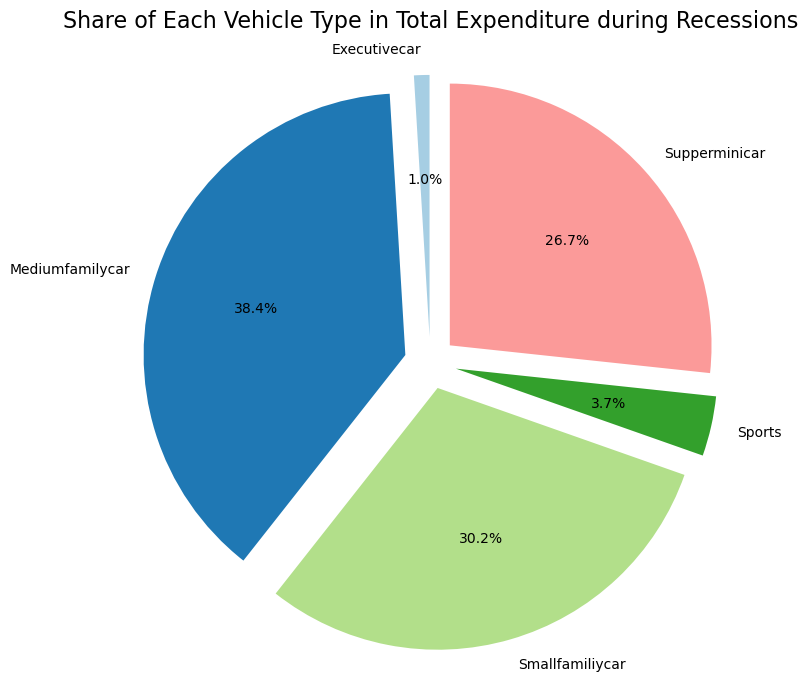

In [24]:
df_recession = df[df['Recession'] == 1]
df_vehicle_ad = df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
values = df_vehicle_ad['Advertising_Expenditure']
labels = df_vehicle_ad['Vehicle_Type']
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, explode=[0.1] * len(values))
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions', fontsize=16)
plt.tight_layout()
plt.show()

The advertising was focused heavily on small, cheaper vehicle class during the recession. Makes sense. 

TASK 1.9

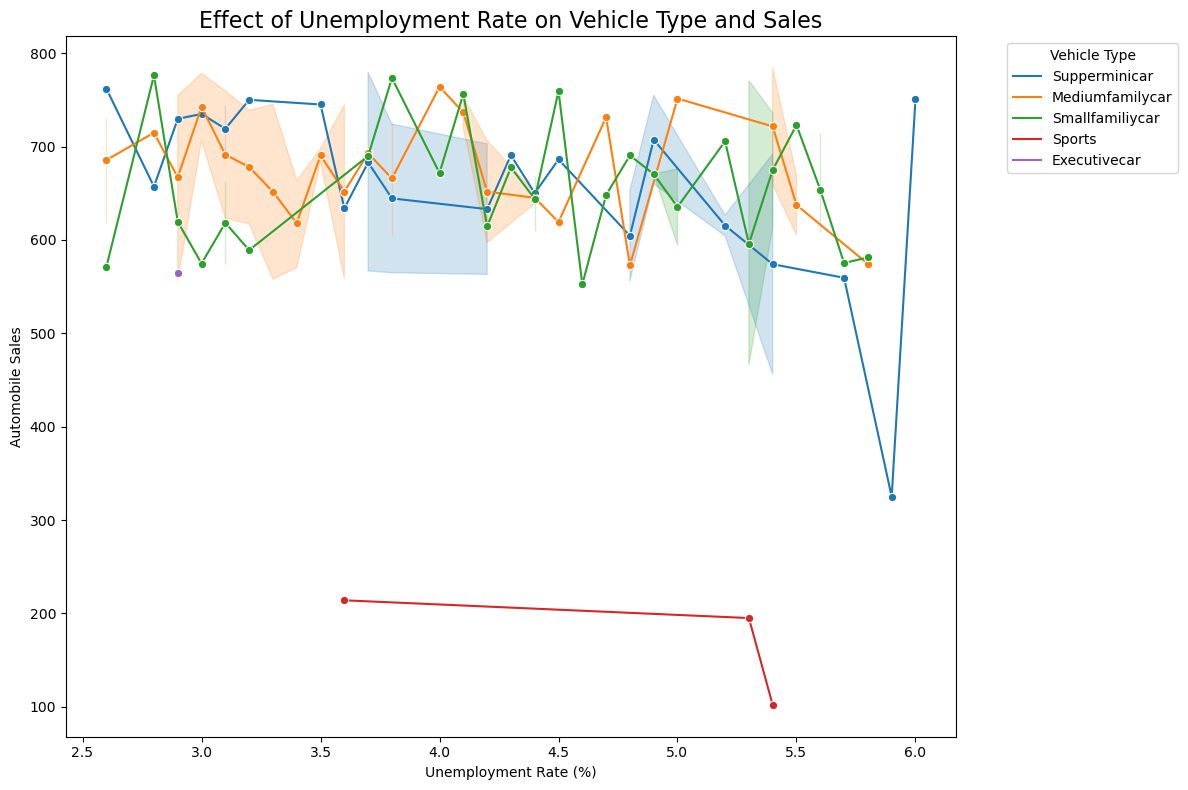

In [27]:
df_recession = df[df['Recession'] == 1]

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_recession, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales', fontsize=16)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Automobile Sales')
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Eh, while the buying pattern changed, there isn't much fluctuation while unemployment climbed up. People just kept buying the cheaper vehicle class.